#### Name Dipika Sharma
#### DSC 640 T301 Data Presentation and Visualization
#### Week 9 & 10

## Excercise 5.2 Heat maps, Spatial charts, and Lollipop charts

In [1]:
## Lets Import the required libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium

In [2]:
## Using costcos-geocoded data and ppg2008 data for exercise 5.2
## Lets load the data

df_Costcos = pd.read_csv("costcos-geocoded.csv")
df_ppg = pd.read_csv("ppg2008.csv", index_col=0)

In [3]:
## Let see how the costcos data looks

df_Costcos.head(5)

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [4]:
## Let see how the ppg2008 data looks

df_ppg.head(5)

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
Name,,,,,,,,,,,,,,,,,,,,
Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,1.1,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,1.6,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,1.4,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,0.8,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,2.7,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [5]:
## Rescaling the values of ppg2008 dataframe

df_ppg_norm = (df_ppg - df_ppg.mean())/df_ppg.std()

## Heat Map

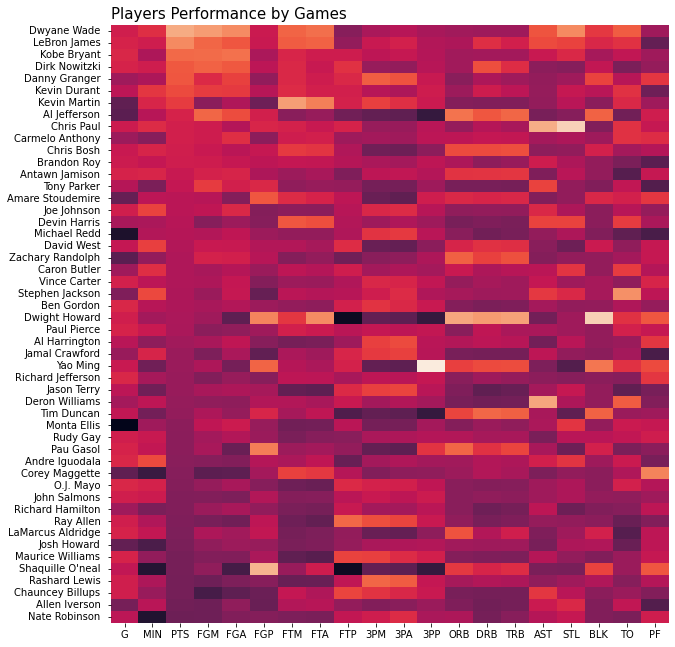

In [6]:
## Lets work on heat map
## Initialize the variable
f, ax = plt.subplots(figsize=(10, 11))

## Building heat map
sns.heatmap(df_ppg_norm, cbar=False)

## Lets add heat map title
plt.title("Players Performance by Games", fontsize = 15, loc = 'left')
plt.ylabel("")

plt.show()

## Spatial Chart

In [7]:
## Lets build the spatial Chart
## Creating map
m = folium.Map(location=[39.83,-98.58],  
               tiles="OpenStreetMap", zoom_start=4)

## Adding values to markers
for i in range(0, len(df_Costcos)):
    folium.Marker(
        location=[df_Costcos.iloc[i]['Latitude'], df_Costcos.iloc[i]['Longitude']],
        popup=df_Costcos.iloc[i]['City'],
    ).add_to(m)

## Lets add the title to the spatial chart
title_html = '''<h3 align="center" style="font-size:20px"><b>Costcos Location in US</b></h3>'''
m.get_root().html.add_child(folium.Element(title_html))

## Lets display the Spatial Chart
m


## Lollipop Chart

In [8]:
## Creating dataframe with ppg2008 data

df_ppg = pd.read_csv("ppg2008.csv")

In [9]:
## Let see how the data looks

df_ppg.columns

Index(['Name  ', 'G', 'MIN', 'PTS', 'FGM', 'FGA', 'FGP', 'FTM', 'FTA', 'FTP',
       '3PM', '3PA', '3PP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TO',
       'PF'],
      dtype='object')

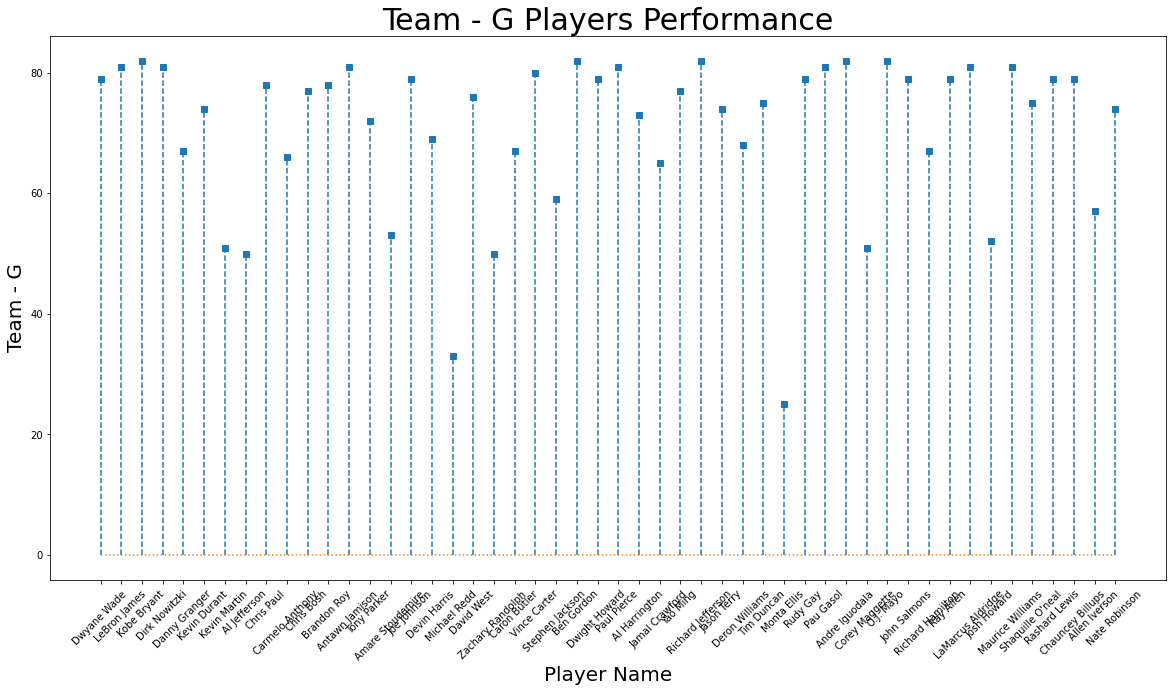

In [10]:
## lets plot lollipop chart

## Setting the figure size
plt.figure(figsize=(20,10))
plt.stem(df_ppg['Name  '], df_ppg.G, markerfmt = 's', linefmt='--', basefmt = ':')
plt.xticks(rotation=45)

## Lets add the title, xlabel and ylabel
plt.xlabel("Player Name", fontsize = 20)
plt.ylabel("Team - G", fontsize = 20)
plt.title("Team - G Players Performance", fontsize = 30)
plt.show()